In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
np.random.seed(125)

f = np.random.randint(0, 7, [5, 5])
print(f)

[[5 5 2 3 6]
 [5 6 4 3 3]
 [0 5 6 2 3]
 [6 5 2 5 0]
 [4 3 2 4 1]]


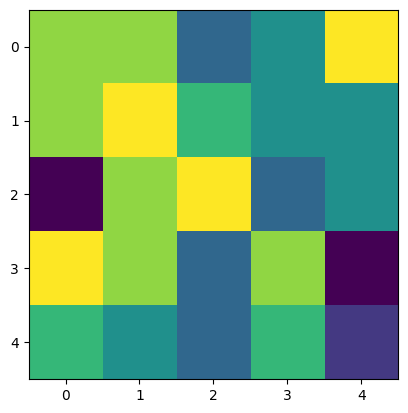

In [22]:
plt.imshow(f)

In [7]:
w = np.matrix([ [1, 2, 0], [1, 4, 0], [0, 0, 0] ]) / 8
print(w)

[[0.125 0.25  0.   ]
 [0.125 0.5   0.   ]
 [0.    0.    0.   ]]


In [8]:
wf = np.flip( np.flip(w, 0), 1)
print(wf)

[[0.    0.    0.   ]
 [0.    0.5   0.125]
 [0.    0.25  0.125]]


In [9]:
x = 1
y = 2

$g(x,y)=w(x,y)*f(x,y)=w_f(x,y)\star f(x,y)$

In [12]:
mult_1_2 = np.multiply(f[x-1:x+2, y-1:y+2], wf)
print(mult_1_2)

[[0.    0.    0.   ]
 [0.    2.    0.375]
 [0.    1.5   0.25 ]]


In [14]:
g_1_2 = int(np.sum(mult_1_2))
print(g_1_2)

4


In [15]:
def conv_point(f, w, x, y, debug=False):
    n, m = w.shape
    a = int((n-1)/2)
    b = int((m-1)/2)
    
    sub_f = f[x-a:x+a+1, y-b:y+b+1]
    
    w_flip = np.flip(np.flip(w, 0), 1)
    
    if (debug == True):
        print("sub-image f:\n", str(sub_f))
        print("flipped filter:\n", str(w_flip))
        
    value = np.sum(np.multiply(sub_f, w_flip))
    return value

In [16]:
conv_point(f, w, x, y)

4.125

In [27]:
def img_conv(f, w, debug=False):
    n, m = w.shape
    a = int((n-1)/2)
    b = int((m-1)/2)
    N, M = f.shape
    
    g = np.array(f, copy=True)
    
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = conv_point(f, w, x, y, debug).astype(np.uint8)
    return g

In [28]:
g = img_conv(f, w)
print(g)

[[5 5 2 3 6]
 [5 5 4 2 3]
 [0 4 4 2 3]
 [6 3 2 3 0]
 [4 3 2 4 1]]


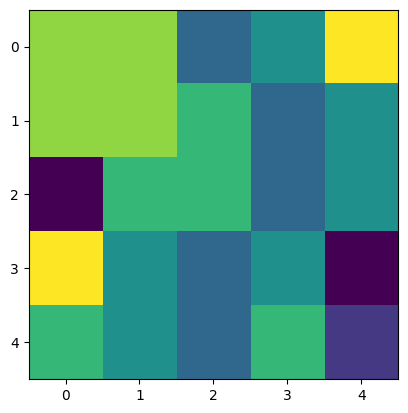

In [29]:
plt.imshow(g)

Exercise: Implement Zero Padding